# Day 2 - Assignment

## Problem 1
Calculate the number of lunar months in a year.

In [46]:
import astropy.constants as c
import astropy.units as u
days_in_LM = 29.531*u.day
days_in_yr = 365.25*u.day
no_of_months = days_in_yr/days_in_LM
print(no_of_months)





12.368358673935864


## Problem 2 
Calculate the distance of geostationary satellite from the center of the Earth, in the units of Earth radius, Geostationary satellite has timeperiod equal to Earth's sidereal rotation period.
$$\dfrac{GM}{r^3}=\dfrac{4\pi}{T^2}$$

In [47]:
# Your code
import numpy as np
import astropy.units as u
import astropy.constants as c
G = c.G
M =c.M_earth
T = u.sday.to(u.s)

r =np.cbrt((G*M*T**2)/(4*np.pi**2))
val_r =((r.value)*u.m).to(u.R_earth)

print (val_r)


6.610772512189762 earthRad


## Problem 3 

Moon moves away from the Earth, due to tidal forces, at a rate of about 3.8 cm/year. It is at a distance of 3,84,000 km from Earth. We also know, universe expands at a rate given by Hubble’s law, which is about 72 km/s per Mpc. Calculate at what rate the moon moves away in the units of km/s per Mpc. Compare with the expansion of the Universe.

In [48]:
Mtr = (3.8)*u.cm/(u.yr)
moondist= 384000*u.km
mdstmpc =moondist.to(u.Mpc)
HL = 72*(u.km/u.s)/u.Mpc
MTRtoHLunt = Mtr.to(u.km/u.s)
HLM = MTRtoHLunt/mdstmpc
# comparing 
print(HLM/HL) 


1.3438984528309457


## Problem 4

Eckart and Genzel measured the speeds of the stars close to the supermassive black holes at the centre of Milky Way. They found speeds about 300 km/s when these stars were at distance of 0.015 pc from the centre. Estimate the mass of the supermassive blackholes in units of M_sun. Speed of object around massive object is given by $$\nu = \sqrt{\dfrac{GM}{r}}$$

In [49]:
v = 300*u.km/u.s
r = 0.015*u.pc
G =c.G
M = v**2*r/G
Minkg = M.to(u.kg)
print(Minkg.to(u.M_sun))

313886.53053273266 solMass


## Problem 5

Ghez and others identified stars close to the super massive black hole at 0.01pc moving with acceleration of about $3\;mm/s^2$. Estimate the mass of the supermassive blackhole in units of M_sun. Acceleration of object around massive object is given by $$a=\dfrac{GM}{r^2}$$

In [50]:
r =0.01*u.pc
rconv= r.to(u.m)
a = 3*(u.mm)/(u.s)**2
aconv= a.to(u.m/u.s**2)
M = aconv*rconv**2/(c.G.to(u.m**3/(u.kg*u.s**2)))
print(M.to(u.M_sun))




2152339.178659909 solMass


## Problem 6

Sidereal day on Mars is 24h 37m 22.7s and sidereal year on Mars is 686.980 d. 

Mass of the Mars is 0.107 that of the Earth. 
Radius of the Mars is  0.533 that of the Earth. 
Distance of the Mars from the Sun is 1.52368 AU.

- Calculate a solar day on Mars and define it as sol.
- Phobos is at the distance of 9376 km from the Mars. Calculate its period of revolution around Mars in terms of sol.
- Calculate the lunar month (in sol) due to Phobos on Mars.

In [51]:
SrDM = 24*u.hour + 37*u.min + 22.7*u.s
SrYM = 686.980*u.day 
Mmars = 0.107*u.M_earth
Rmars = 0.533*u.R_earth
msdist = 1.52368*u.AU
dispho = 9376*u.km
SLDM = (SrYM*SrDM.to(u.day))/(SrYM-SrDM.to(u.day))
sol = SLDM
print(f"solar day on mars, sol:{sol}")
T_phobos = np.sqrt((4*(np.pi)**2*(dispho.to(u.m))**3)/(c.G*Mmars.to(u.kg)))
T_ph_insol = T_phobos.to(u.day)/sol
print(f"period of revolution around Mars in terms of sol for phobos is {T_ph_insol}")

LMinv = (1/T_phobos) - (1/sol)
lunar_month = (1/LMinv)
print(f"lunar month due to phobos in mars in sol :{lunar_month/sol.to(u.s)}")

solar day on mars, sol:1.0274916637503584 d
period of revolution around Mars in terms of sol for phobos is 0.31113829171303126
lunar month due to phobos in mars in sol :0.45167017990701847


## Problem 7

At what distance a 100 W lamp will provide the same flux as given by the Sun at the Earth. At what distance the lamp should be to match the flux given by Vega?$$F=\dfrac{L}{4\pi d^2}$$

In [52]:
L_lamp = 100 *u.W 
flux_sun = 1361*u.W/u.m**2
d1 = np.sqrt(L_lamp/flux_sun*4*np.pi)
print("Distance of lamp matching flux of sun :",d1)
flux_vega =2.52*u.W/u.m**2
d2 = np.sqrt(L_lamp/flux_vega*4*np.pi)
print("Distance of lamp matching flux of sun :",d2)

Distance of lamp matching flux of sun : 0.9608948580955222 m
Distance of lamp matching flux of sun : 22.330819523022626 m


## Problem 8

Calculate the distance between Mumbai and Mombasa in R_earth and in km.

In [71]:
from astropy.coordinates import EarthLocation
from astropy.coordinates import SkyCoord
#Mumbai = EarthLocation()
#Mombasa = EarthLocation('Mombasa')
Mumbai = EarthLocation(lat=18.975 * u.deg, lon=72.8258 * u.deg, height=14 * u.m)
Mombasa = EarthLocation(lat=-4.0435 * u.deg, lon=39.6682 * u.deg, height=50 * u.m)
dist = np.sqrt(
    (Mumbai.x - Mombasa.x)**2 +
    (Mumbai.y - Mombasa.y)**2 +
    (Mumbai.z - Mombasa.z)**2 )
print(f"Sepration in km: {dist.to(u.km)} and in R_earth: {dist.to(u.km)/c.R_earth.to(u.km)}")




Sepration in km: 4347.1049024075755 km and in R_earth: 0.681567379377491


## Problem 9
Calculate angular separation between stars ‘Fomalhaut’, ‘Canopus’ and ‘Achernar’.

In [56]:
from astropy.coordinates import SkyCoord
Fomalhaut = SkyCoord.from_name('Fomalhaut')
Canopus = SkyCoord.from_name('Canopus')
Achernar = SkyCoord.from_name('Achernar')
separation1 = Fomalhaut.separation(Canopus)
separation2 = Achernar.separation(Canopus)
separation3 = Fomalhaut.separation(Achernar)

print(f"Angular sepration between \n Fomalhaut and Canopus:\t {separation1} \n Achernar and Canopus:\t {separation2} \n Fomalhaut and Achernar:\t {separation3} ")



Angular sepration between 
 Fomalhaut and Canopus:	 78.49624630286158 deg 
 Achernar and Canopus:	 39.40922868552337 deg 
 Fomalhaut and Achernar:	 39.10961151785744 deg 


## Problem 10
Calculate the four sides of the Square of Pegasus. At its vertex are the stars: ‘Alpheratz’, ‘Scheat’, ‘Markab’ and ‘Algenib’.

In [62]:
from astropy.coordinates import SkyCoord
A = SkyCoord.from_name('Alpheratz')
B = SkyCoord.from_name('Scheat')
C = SkyCoord.from_name('Markab')
D = SkyCoord.from_name('Algenib')
s1 = A.separation(B)
s2 = B.separation(C)
s3 = C.separation(D)
s4 = D.separation(A)
print(f"Sides of square with star named in abovementioned series are :\n s1:\t{s1}\n s2:\t{s2}\n s3:\t{s3}\n s4:\t{s4}")






Sides of square with star named in abovementioned series are :
 s1:	14.20877670455847 deg
 s2:	12.879547905669218 deg
 s3:	16.516065696634822 deg
 s4:	13.951744538002126 deg


## Problem 11 - Miller's Planet

In the movie Interstellar, Miller's planet experiences time dilation due to its proximity to a black hole, such that 1 hour on Miller's planet equals 7 years on Earth.

Edwin Hubble first presented his findings about discovering new galaxies during a meeting at Americal Astronomical Society on 1st Jan 1925. 

Use astropy.time module to evaluate how many days/years it has been since this meeting. Assume today's date is 25th December 2024.

Use the def_unit function of astropy to create a new unit definition, say, miller_hour which is equivalent to 7 earth years. 

Test your unit definition by using miller_hour.to(u.year) which should give the output 7.

Find out how many hours it has been on Miller's planet since Hubble's meeting.


In [67]:
from astropy.time import Time
from astropy.units import def_unit
hubble_meeting_date = Time("1925-01-01")
todays_date = Time("2024-12-25")
time_difference = todays_date - hubble_meeting_date
days_since_meeting = time_difference.value
years_since_meeting = time_difference.to(u.yr).value
miller_hour = def_unit("miller_hour", 7 * u.year)
miller_hour_to_years = miller_hour.to(u.year)
hours_on_miller = (years_since_meeting * u.year).to(miller_hour).value
print(f"Days since Hubble's meeting: {days_since_meeting}")
print(f"Years since Hubble's meeting: {years_since_meeting}")
print(f"1 Miller hour in Earth years: {miller_hour_to_years}")
print(f"Hours on Miller's planet since Hubble's meeting: {hours_on_miller}")








Days since Hubble's meeting: 36518.00042824074
Years since Hubble's meeting: 99.98083621694931
1 Miller hour in Earth years: 7.0
Hours on Miller's planet since Hubble's meeting: 14.28297660242133


## Problem 12 - Curve Fitting

You are provided with a noisy dataset that represents some physical phenomenon. The data contains underlying exponential, logarithmic and polynomical components. Your task is to apply curve fitting techniques to this data using exponential, logarithmic and polynomical functions, and determine the best fitting model.

The simulated dataset contains two columns `x`(independent variable) and `y`(dependent variable). Your objective is to fit the data to three different models and evaluate the goodness of the fit.

1. Load the data from provided csv file `astronomy_fit_data.csv`
2. Create three functions for Exponential model, logarithmic model and polynomial model (degree 4)

You can use these equations for your model


\begin{align*}
\textbf{Exponential:} \quad & y(x) = G \cdot e^{H \cdot x} \\
\\
\textbf{Logarithmic:} \quad & y(x) = D \cdot \log(E \cdot x + F) \\
\\
\textbf{Polynomial:} \quad & y(x) = I \cdot x^4 + J \cdot x^3 + K \cdot x^2 + L \cdot x
\end{align*}



For the initial conditions you can use these values

\begin{align}
\textbf{Exponential:} \quad & G = 10, \quad H = -0.1 \\
\textbf{Logarithmic:} \quad & D = 8, \quad E = 2, \quad F = 2 \\
\textbf{Polynomial:} \quad & I = 0.5, \quad J = -2, \quad K = 6, \quad L = -15
\end{align}


Visualise the data first.

Then visualise all three fits in the same plot.

Use $R^2$ value for eachmodel to evaluate the goodness and determine which function is the best fit using this value.

Try using different initial condition values to determine if the goodness of the fit increases or decreases.

It is possible that you will face the below error when trying to fit the curve.

```RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.```

Debugging is part of learning, so try to find solution to how you can mitigate this error.


C:\Users\rpj20\AppData\Local\Temp\ipykernel_46548\2969501499.py:17: RuntimeWarning: invalid value encountered in log
  return D * np.log(E * x + F)


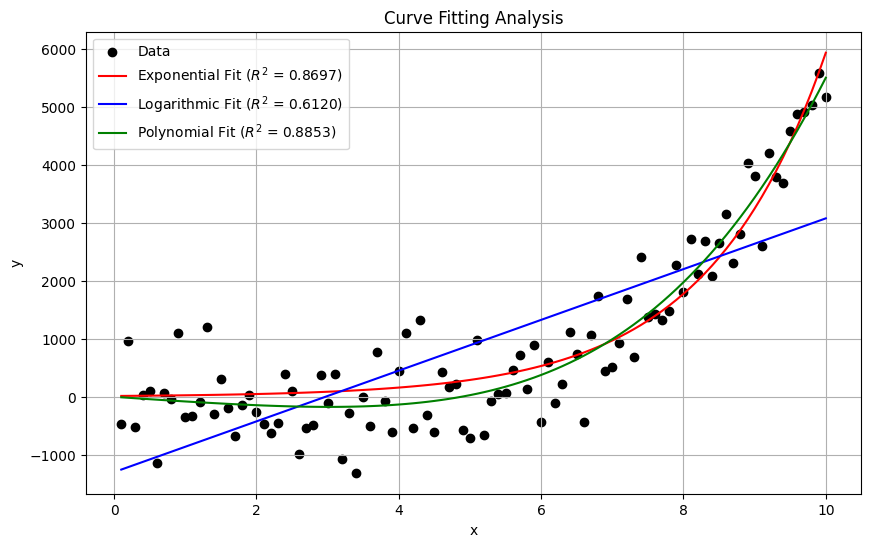

Fitted parameters:
Exponential: G = 14.2521, H = 0.6032
Logarithmic: D = 30949613.5379, E = 0.0000, F = 1.0000
Polynomial: I = 0.6497, J = -0.6766, K = 5.4686, L = -85.9870

Goodness of fit:
Exponential R^2: 0.8697
Logarithmic R^2: 0.6120
Polynomial R^2: 0.8853

Best fitting model: Polynomial with R^2 = 0.8853


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data
data = pd.read_csv('astronomy_fit_data.csv')
x = data['x'].values
y = data['y'].values

# Define models

def exponential_model(x, G, H):
    return G * np.exp(H * x)

def logarithmic_model(x, D, E, F):
    return D * np.log(E * x + F)

def polynomial_model(x, I, J, K, L):
    return I * x**4 + J * x**3 + K * x**2 + L * x

# Initial conditions
exp_initial = [10, -0.1]
log_initial = [8, 2, 2]
poly_initial = [0.5, -2, 6, -15]

# Fit models
exp_params, _ = curve_fit(exponential_model, x, y, p0=exp_initial, maxfev=10000)
log_params, _ = curve_fit(logarithmic_model, x, y, p0=log_initial, maxfev=10000)  # here we encountered runtime error as listed so increased maxfev
poly_params, _ = curve_fit(polynomial_model, x, y, p0=poly_initial, maxfev=10000)

# Calculate predictions
y_exp = exponential_model(x, *exp_params)
y_log = logarithmic_model(x, *log_params)
y_poly = polynomial_model(x, *poly_params)

# Calculate R^2 values
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_exp = calculate_r2(y, y_exp)
r2_log = calculate_r2(y, y_log)
r2_poly = calculate_r2(y, y_poly)

# Plot data and fits
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='black')
plt.plot(x, y_exp, label=f'Exponential Fit ($R^2$ = {r2_exp:.4f})', color='red')
plt.plot(x, y_log, label=f'Logarithmic Fit ($R^2$ = {r2_log:.4f})', color='blue')
plt.plot(x, y_poly, label=f'Polynomial Fit ($R^2$ = {r2_poly:.4f})', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Fitted parameters:")
print(f"Exponential: G = {exp_params[0]:.4f}, H = {exp_params[1]:.4f}")
print(f"Logarithmic: D = {log_params[0]:.4f}, E = {log_params[1]:.4f}, F = {log_params[2]:.4f}")
print(f"Polynomial: I = {poly_params[0]:.4f}, J = {poly_params[1]:.4f}, K = {poly_params[2]:.4f}, L = {poly_params[3]:.4f}")

print("\nGoodness of fit:")
print(f"Exponential R^2: {r2_exp:.4f}")
print(f"Logarithmic R^2: {r2_log:.4f}")
print(f"Polynomial R^2: {r2_poly:.4f}")

# Determine the best model
best_model = max((r2_exp, "Exponential"), (r2_log, "Logarithmic"), (r2_poly, "Polynomial"))
print(f"\nBest fitting model: {best_model[1]} with R^2 = {best_model[0]:.4f}")


## Problem 13 - Galactic Time Zones

The Milky Way rotates around its center such that the Sun takes approximately 225 million years to complete one orbit, known as the "Galactic Year."  

- Using the `astropy.units` module, define a new time unit called `galactic_year`.  
- Calculate how many Galactic Years have passed since the Solar System's formation (~4.6 billion years ago).  
- Bonus: If one Galactic Year is divided into 12 Galactic Months, how many Galactic Months has the Solar System existed?

In [77]:
from astropy.units import def_unit
galactic_year = def_unit("galactic_year", 225e6 * u.year)
slrsysage= 4.6e9 * u.year
galyrpssd = slrsysage.to(galactic_year)
galactic_month = galactic_year / 12
galmnthpssd = slrsysage.to(galactic_month)
print(f"Galactic Years passed since Solar System's formation: {galyrpssd.value}")
print(f"Galactic Months passed since Solar System's formation: {galmnthpssd.value}")










Galactic Years passed since Solar System's formation: 20.444444444444443
Galactic Months passed since Solar System's formation: 245.33333333333334


## Problem 14 - Supernova Timing
Type Ia supernovae are standard candles used to measure cosmic distances. Their luminosity fades over time according to the formula $$ L(t) = L_0 e^{-kt} $$

where $ L_0 $ is the initial luminosity and $ k $ is the decay constant. Assume $ L_0 = 10^9 $ $L_\odot$ and $ k = 0.693 $ and $t$ is time in days.

To solve for the time \( t \) when the luminosity drops to $ L(t) = L_{\text{target}} = $ $ 10^6 $ $L_\odot$, we rearrange the equation:

$$
L(t) = L_0 e^{-kt} \quad \Rightarrow \quad t = \frac{\ln(L_0 / L(t))}{k}
$$

- Using `numpy` and `matplotlib`, plot the luminosity decay over 50 days.  
- Calculate how long it will take for the luminosity to drop to $ 10^6 $ $L_\odot$

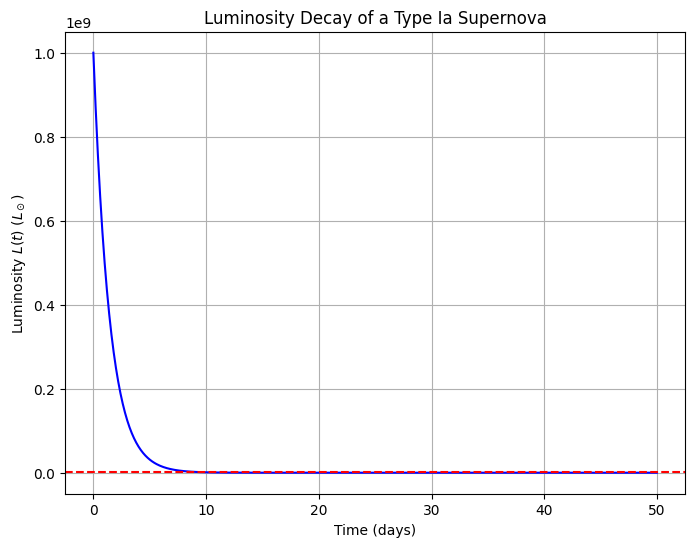

Time for luminosity to drop to 10^6 L_sun: 9.97 days


In [93]:

L0 = 10**9 
k = 0.693   
time = np.linspace(0, 50, 500)  # Time from 0 to 50 days

# Calculate luminosity as a function of time
L_t = L0 * np.exp(-k * time)

# Plot the luminosity decay curve
plt.figure(figsize=(8, 6))
plt.plot(time, L_t, label=r'$L(t) = L_0 e^{-kt}$', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Luminosity $L(t)$ ($L_\odot$)')
plt.title('Luminosity Decay of a Type Ia Supernova')
plt.axhline(y=10**6, color='red', linestyle='--', label=r'$L_{\text{target}} = 10^6 L_\odot$')
plt.grid()
plt.show()
L_target = 10**6
t_target = np.log(L0 / L_target) / k
print(f'Time for luminosity to drop to 10^6 L_sun: {t_target:.2f} days')

## Problem 15 - Calculating the Area Spanned by Three Stars


Consider three stars in the sky, each with known Right Ascension (RA) and Declination (Dec) coordinates in the International Celestial Reference System (ICRS). You are tasked with calculating the area spanned by these three stars, forming a [spherical triangle](https://en.wikipedia.org/wiki/Spherical_trigonometry#Notation).



Given the coordinates of the stars in RA and Dec, your goal is to calculate the angular separation between each pair of stars, then use the law of cosines to find the angles of the spherical triangle formed by the stars. Finally, apply the spherical excess formula to determine the area of the spherical triangle on the unit sphere.

### Coordinates of the Stars:

1. **Pleiades**: RA = 03h 48m 30.4s, Dec = +24°11'44.8"
2. **Aldebaran**: RA = 04h 37m 22.7s, Dec = +16°33'36.4"
3. **Capella**: RA = 05h 18m 34.2s, Dec = +46°01'26.1"

### Steps to Solve:

1. **Convert the RA and Dec** of the stars into SkyCoord objects in the ICRS frame using Astropy.
2. **Calculate the angular separation** between each pair of stars.
3. **Convert the angular separations** from degrees to radians.
4. **[Apply the law of cosines](https://en.wikipedia.org/wiki/Spherical_trigonometry#Supplemental_cosine_rules)** to calculate the angles at each vertex of the spherical triangle formed by the stars:
   - Formula for the angles:
     - For angle 1 (opposite side `sep12` =`pleiades.separation(aldebaran)`):
       $$ \cos(	\theta_1) = \dfrac{\cos(	\text{sep23}) - \cos(	\text{sep12}) \cdot \cos(	\text{sep31})}{\sin(	\text{sep12}) \cdot \sin(	\text{sep31})} $$
     - For angle 2 (opposite side `sep23` = `aldebaran.separation(capella)`):
       $$ \cos(	\theta_2) = \dfrac{\cos(	\text{sep31}) - \cos(	\text{sep12}) \cdot \cos(	\text{sep23})}{\sin(	\text{sep12}) \cdot \sin(	\text{sep23})} $$
     - For angle 3 (opposite side `sep31` = `capella.separation(pleiades)`):
       $$ \cos(	\theta_3) = \dfrac{\cos(	\text{sep12}) - \cos(	\text{sep31}) \cdot \cos(	\text{sep23})}{\sin(	\text{sep31}) \cdot \sin(	\text{sep23})} $$

5. **Calculate the angles** using the arccosine function. Once you find $\cos(\theta)$ you can use this code line to find theta values `theta1 = np.arccos(np.clip(cos_angle1, -1.0, 1.0))` Here the np.clip function is used to prevent errors due to numerical inaccuracies when computing the inverse cosine. 
6. **Apply the spherical excess formula** to find the area of the spherical triangle:
   $$ 	\text{Area} = 	\theta_1 + 	\theta_2 + 	\theta_3 - \pi $$

   The area is the spherical excess in **steradians**.



In [97]:
pleiades_ra = '03h 48m 30.4s'
pleiades_dec = '+24d 11m 44.8s'
aldebaran_ra = '04h 37m 22.7s'
aldebaran_dec = '+16d 33m 36.4s'
capella_ra = '05h 18m 34.2s'
capella_dec = '+46d 01m 26.1s'
pleiades = SkyCoord(ra=pleiades_ra, dec=pleiades_dec, frame='icrs')
aldebaran = SkyCoord(ra=aldebaran_ra, dec=aldebaran_dec, frame='icrs')
capella = SkyCoord(ra=capella_ra, dec=capella_dec, frame='icrs')
sep12 = pleiades.separation(aldebaran).radian 
sep23 = aldebaran.separation(capella).radian  
sep31 = capella.separation(pleiades).radian   
# Formula: cos(theta) = (cos(sep23) - cos(sep12) * cos(sep31)) / (sin(sep12) * sin(sep31))

# For angle at Pleiades (theta1):
cos_theta1 = (np.cos(sep23) - np.cos(sep12) * np.cos(sep31)) / (np.sin(sep12) * np.sin(sep31))
theta1 = np.arccos(np.clip(cos_theta1, -1.0, 1.0))

# For angle at Aldebaran (theta2):
cos_theta2 = (np.cos(sep31) - np.cos(sep12) * np.cos(sep23)) / (np.sin(sep12) * np.sin(sep23))
theta2 = np.arccos(np.clip(cos_theta2, -1.0, 1.0))

# For angle at Capella (theta3):
cos_theta3 = (np.cos(sep12) - np.cos(sep31) * np.cos(sep23)) / (np.sin(sep31) * np.sin(sep23))
theta3 = np.arccos(np.clip(cos_theta3, -1.0, 1.0))

area = theta1 + theta2 + theta3 - np.pi
print(f"Angular separation between Pleiades and Aldebaran: {sep12 * 180 / np.pi}")
print(f"Angular separation between Aldebaran and Capella: {sep23 * 180 / np.pi}")
print(f"Angular separation between Capella and Pleiades: {sep31 * 180 / np.pi:}")
print(f"Angle at Pleiades: {theta1 * 180 / np.pi}")
print(f"Angle at Aldebaran: {theta2 * 180 / np.pi}")
print(f"Angle at Capella: {theta3 * 180 / np.pi}")
print(f"Spherical triangle area (in steradians): {area:.6f} sr")









Angular separation between Pleiades and Aldebaran: 13.753013486251556
Angular separation between Aldebaran and Capella: 30.68953645987448
Angular separation between Capella and Pleiades: 28.354650561999758
Angle at Pleiades: 87.3849676737888
Angle at Aldebaran: 68.3660103335827
Angle at Capella: 27.730509104383312
Spherical triangle area (in steradians): 0.060763 sr
